In [34]:
import numpy as np
from networkx.algorithms.community import LFR_benchmark_graph

In [35]:
n = 1000
tau1 = 2
tau2 = 1.05
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,min_community=50, seed=11, max_iters=100)

In [36]:
communities = {frozenset(G.nodes[v]['community']) for v in G}
print(communities)

{frozenset({643, 772, 900, 7, 903, 10, 11, 524, 782, 278, 24, 282, 539, 542, 31, 32, 30, 807, 39, 554, 171, 940, 47, 49, 564, 822, 56, 952, 316, 76, 77, 80, 507, 854, 470, 215, 727, 730, 859, 220, 738, 355, 226, 228, 741, 359, 617, 491, 877, 366, 749, 240, 241, 760, 763, 503, 504, 761, 635, 252, 253, 511}), frozenset({4, 522, 18, 532, 21, 536, 25, 538, 287, 806, 41, 557, 48, 563, 317, 321, 322, 73, 79, 596, 88, 606, 96, 97, 614, 105, 116, 632, 889, 634, 124, 126, 638, 642, 645, 134, 902, 911, 409, 922, 411, 413, 672, 931, 421, 939, 941, 430, 943, 179, 438, 440, 185, 955, 443, 196, 965, 968, 459, 717, 719, 975, 981, 472, 475, 476, 990, 485, 744, 489, 236, 509, 767}), frozenset({512, 1, 2, 0, 774, 6, 521, 13, 273, 274, 785, 281, 286, 802, 37, 167, 45, 301, 560, 311, 568, 58, 571, 61, 573, 447, 832, 576, 703, 324, 837, 582, 198, 329, 972, 78, 593, 721, 978, 85, 94, 222, 479, 994, 996, 869, 486, 230, 742, 747, 237, 111, 367, 883, 246, 380, 249, 636}), frozenset({896, 641, 897, 644, 132, 51

In [37]:
len(communities)

11

In [38]:
import networkx as nx

In [39]:
g_array = nx.to_numpy_array(G)

In [40]:
np.set_printoptions(threshold=100)

In [41]:
g_array

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
np.random.rand()

0.17525305843502648

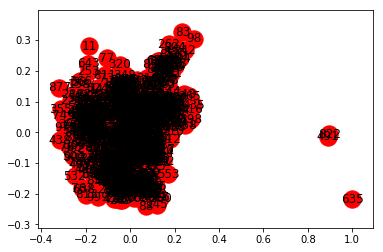

In [43]:
nx.draw_networkx(G)

In [44]:
G = np.zeros((500, 500))

In [14]:
for i in range(500):
    for j in range(i, 500):
        if j <= i+10:
            if np.random.rand() < 3/10:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()
        else:
            if np.random.rand() < 3/490:
                G[i][j] = np.random.randn()
                G[j][i] = np.random.randn()

In [15]:
G=nx.from_numpy_matrix(G)

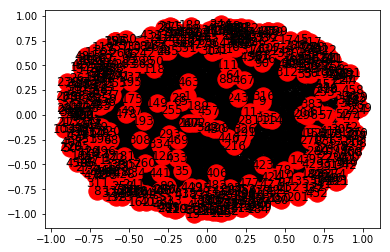

In [16]:
nx.draw_networkx(G)

In [17]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            if j <= i+(N/community_number):
                if np.random.rand() < average_degree*(1-mu)/(N/community_number):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
            else:
                if np.random.rand() < average_degree*(mu)/(N-(N/community_number)):
                    G[i][j] = np.random.randn()
                    G[j][i] = np.random.randn()
    return G

In [18]:
G_array = make_modular_network(50, 5, 25, 0.1)

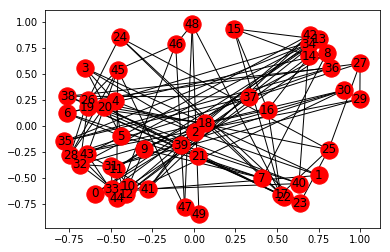

In [19]:
G=nx.from_numpy_matrix(G_array)
nx.draw_networkx(G)

In [20]:
def make_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N/community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(1-(mu*0.5))-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                        G[i][j] = 1
                        G[j][i] = 1
            elif j < size*((i//size)+2):
                if int(com_index) == 0 or int(com_index) == community_number-1:
                    if np.random.rand() < (average_degree*(mu*0.5)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                else:
                    if np.random.rand() < (average_degree*(mu)-k_out_prev)/size:
                        G[i][j] = 1
                        G[j][i] = 1
                    
    return G

In [79]:
def make_modular_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    G = np.zeros((N, N))
    size = N/community_number
    for i in range(N):
        com_index = i//size
        k_in_prev = 0
        k_out_prev = 0
        for j in range(int(size*com_index)):
            if G[i][j] != 0:
                k_out_prev += 1
        for j in range(int(size*com_index), int(size*(com_index+1))):
            if G[i][j] != 0:
                k_in_prev += 1
        for j in range(i, N):
            if j < size*((i//size)+1):
                if np.random.rand() < (average_degree*(1-mu)-k_in_prev)/(size-(i-(size*com_index))+1):
                    G[i][j] = 1
                    G[j][i] = 1
            else:
                if np.random.rand() < (average_degree*(mu)-k_out_prev)/(N-(size*((i//size)+1))+1):
                    G[i][j] = 1
                    G[j][i] = 1
    return G

In [106]:
G_array = make_modular_network(200, 20, 4, 0.5)
G=nx.from_numpy_matrix(G_array)

In [107]:
G.degree()

DegreeView({0: 20, 1: 18, 2: 18, 3: 17, 4: 8, 5: 17, 6: 19, 7: 16, 8: 20, 9: 17, 10: 14, 11: 17, 12: 18, 13: 17, 14: 10, 15: 19, 16: 19, 17: 19, 18: 19, 19: 29, 20: 19, 21: 19, 22: 18, 23: 19, 24: 19, 25: 19, 26: 18, 27: 20, 28: 23, 29: 23, 30: 20, 31: 14, 32: 20, 33: 23, 34: 18, 35: 22, 36: 19, 37: 21, 38: 21, 39: 22, 40: 14, 41: 22, 42: 18, 43: 22, 44: 19, 45: 22, 46: 18, 47: 15, 48: 21, 49: 26, 50: 16, 51: 17, 52: 22, 53: 26, 54: 25, 55: 19, 56: 25, 57: 20, 58: 20, 59: 25, 60: 20, 61: 21, 62: 20, 63: 24, 64: 20, 65: 20, 66: 20, 67: 27, 68: 18, 69: 19, 70: 21, 71: 20, 72: 22, 73: 20, 74: 12, 75: 20, 76: 20, 77: 16, 78: 21, 79: 18, 80: 26, 81: 19, 82: 23, 83: 17, 84: 14, 85: 20, 86: 17, 87: 15, 88: 21, 89: 23, 90: 18, 91: 19, 92: 18, 93: 17, 94: 23, 95: 19, 96: 27, 97: 20, 98: 22, 99: 15, 100: 20, 101: 22, 102: 24, 103: 19, 104: 20, 105: 18, 106: 23, 107: 22, 108: 21, 109: 15, 110: 19, 111: 20, 112: 22, 113: 14, 114: 22, 115: 21, 116: 23, 117: 16, 118: 19, 119: 20, 120: 24, 121: 25, 1

In [108]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [109]:
print(degree_sequence)

[29, 28, 27, 27, 27, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 12, 10, 8]


In [110]:
np.mean(degree_sequence)

19.89

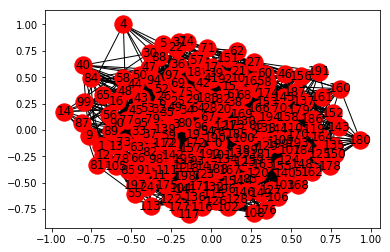

In [111]:
nx.draw_networkx(G)

In [112]:
nx.average_clustering(G)

0.10582957901602849

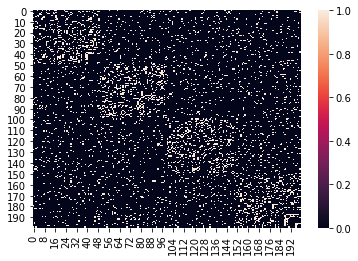

In [113]:
import seaborn as sns
sns.heatmap(G_array)

In [116]:
G_smallworld = nx.watts_strogatz_graph(128, k=16, p=0.01)
degree_sequence = sorted([d for n, d in G_smallworld.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15]
16.0


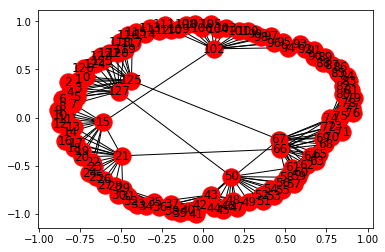

In [117]:
nx.draw_networkx(G_smallworld)

In [118]:
nx.average_clustering(G_smallworld)

0.687001415149394

In [59]:
G_array = make_modular_network(128, 16, 4, 0.1)
G=nx.from_numpy_matrix(G_array)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print(degree_sequence)
print(np.mean(degree_sequence))

[23, 22, 22, 21, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 11]
16.203125


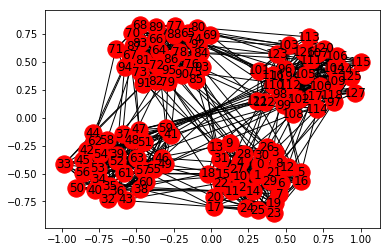

In [62]:
nx.draw_networkx(G)

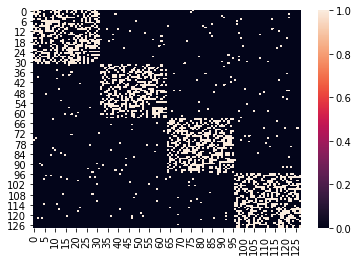

In [63]:
import seaborn as sns
sns.heatmap(G_array)